In [1]:
# adp 19회 ML 신용카드 고객 이탈여부 예측 (분류) 
# dacon 데이터로 대체 - 신용카드 고객 credit 예측 (https://dacon.io/competitions/official/235713/data)

In [2]:
### EDA / 시각화 
### train / test set 7:3 비율로 분리 후 이탈 여부 예측하는 분류 모델 3가지
### 각 모델별 confusion matrix
### 위의 모델 바탕으로 앙상블 모형 만들고 
### credit_test.csv로 예측한 이탈여부 확률 result.csv로 저장하여 제출

### -> 데이터가 다르므로
### dacon 파일에 있는 crdit (0/1/2) 을 이탈여부(0/1) 으로 변경하여 활용
### train / test set 분할하지 않고 dacon 파일 그대로 활용

In [3]:
import pandas as pd
ddf = pd.read_csv('data/adp19-2_train.csv')

In [4]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [5]:
# EDA

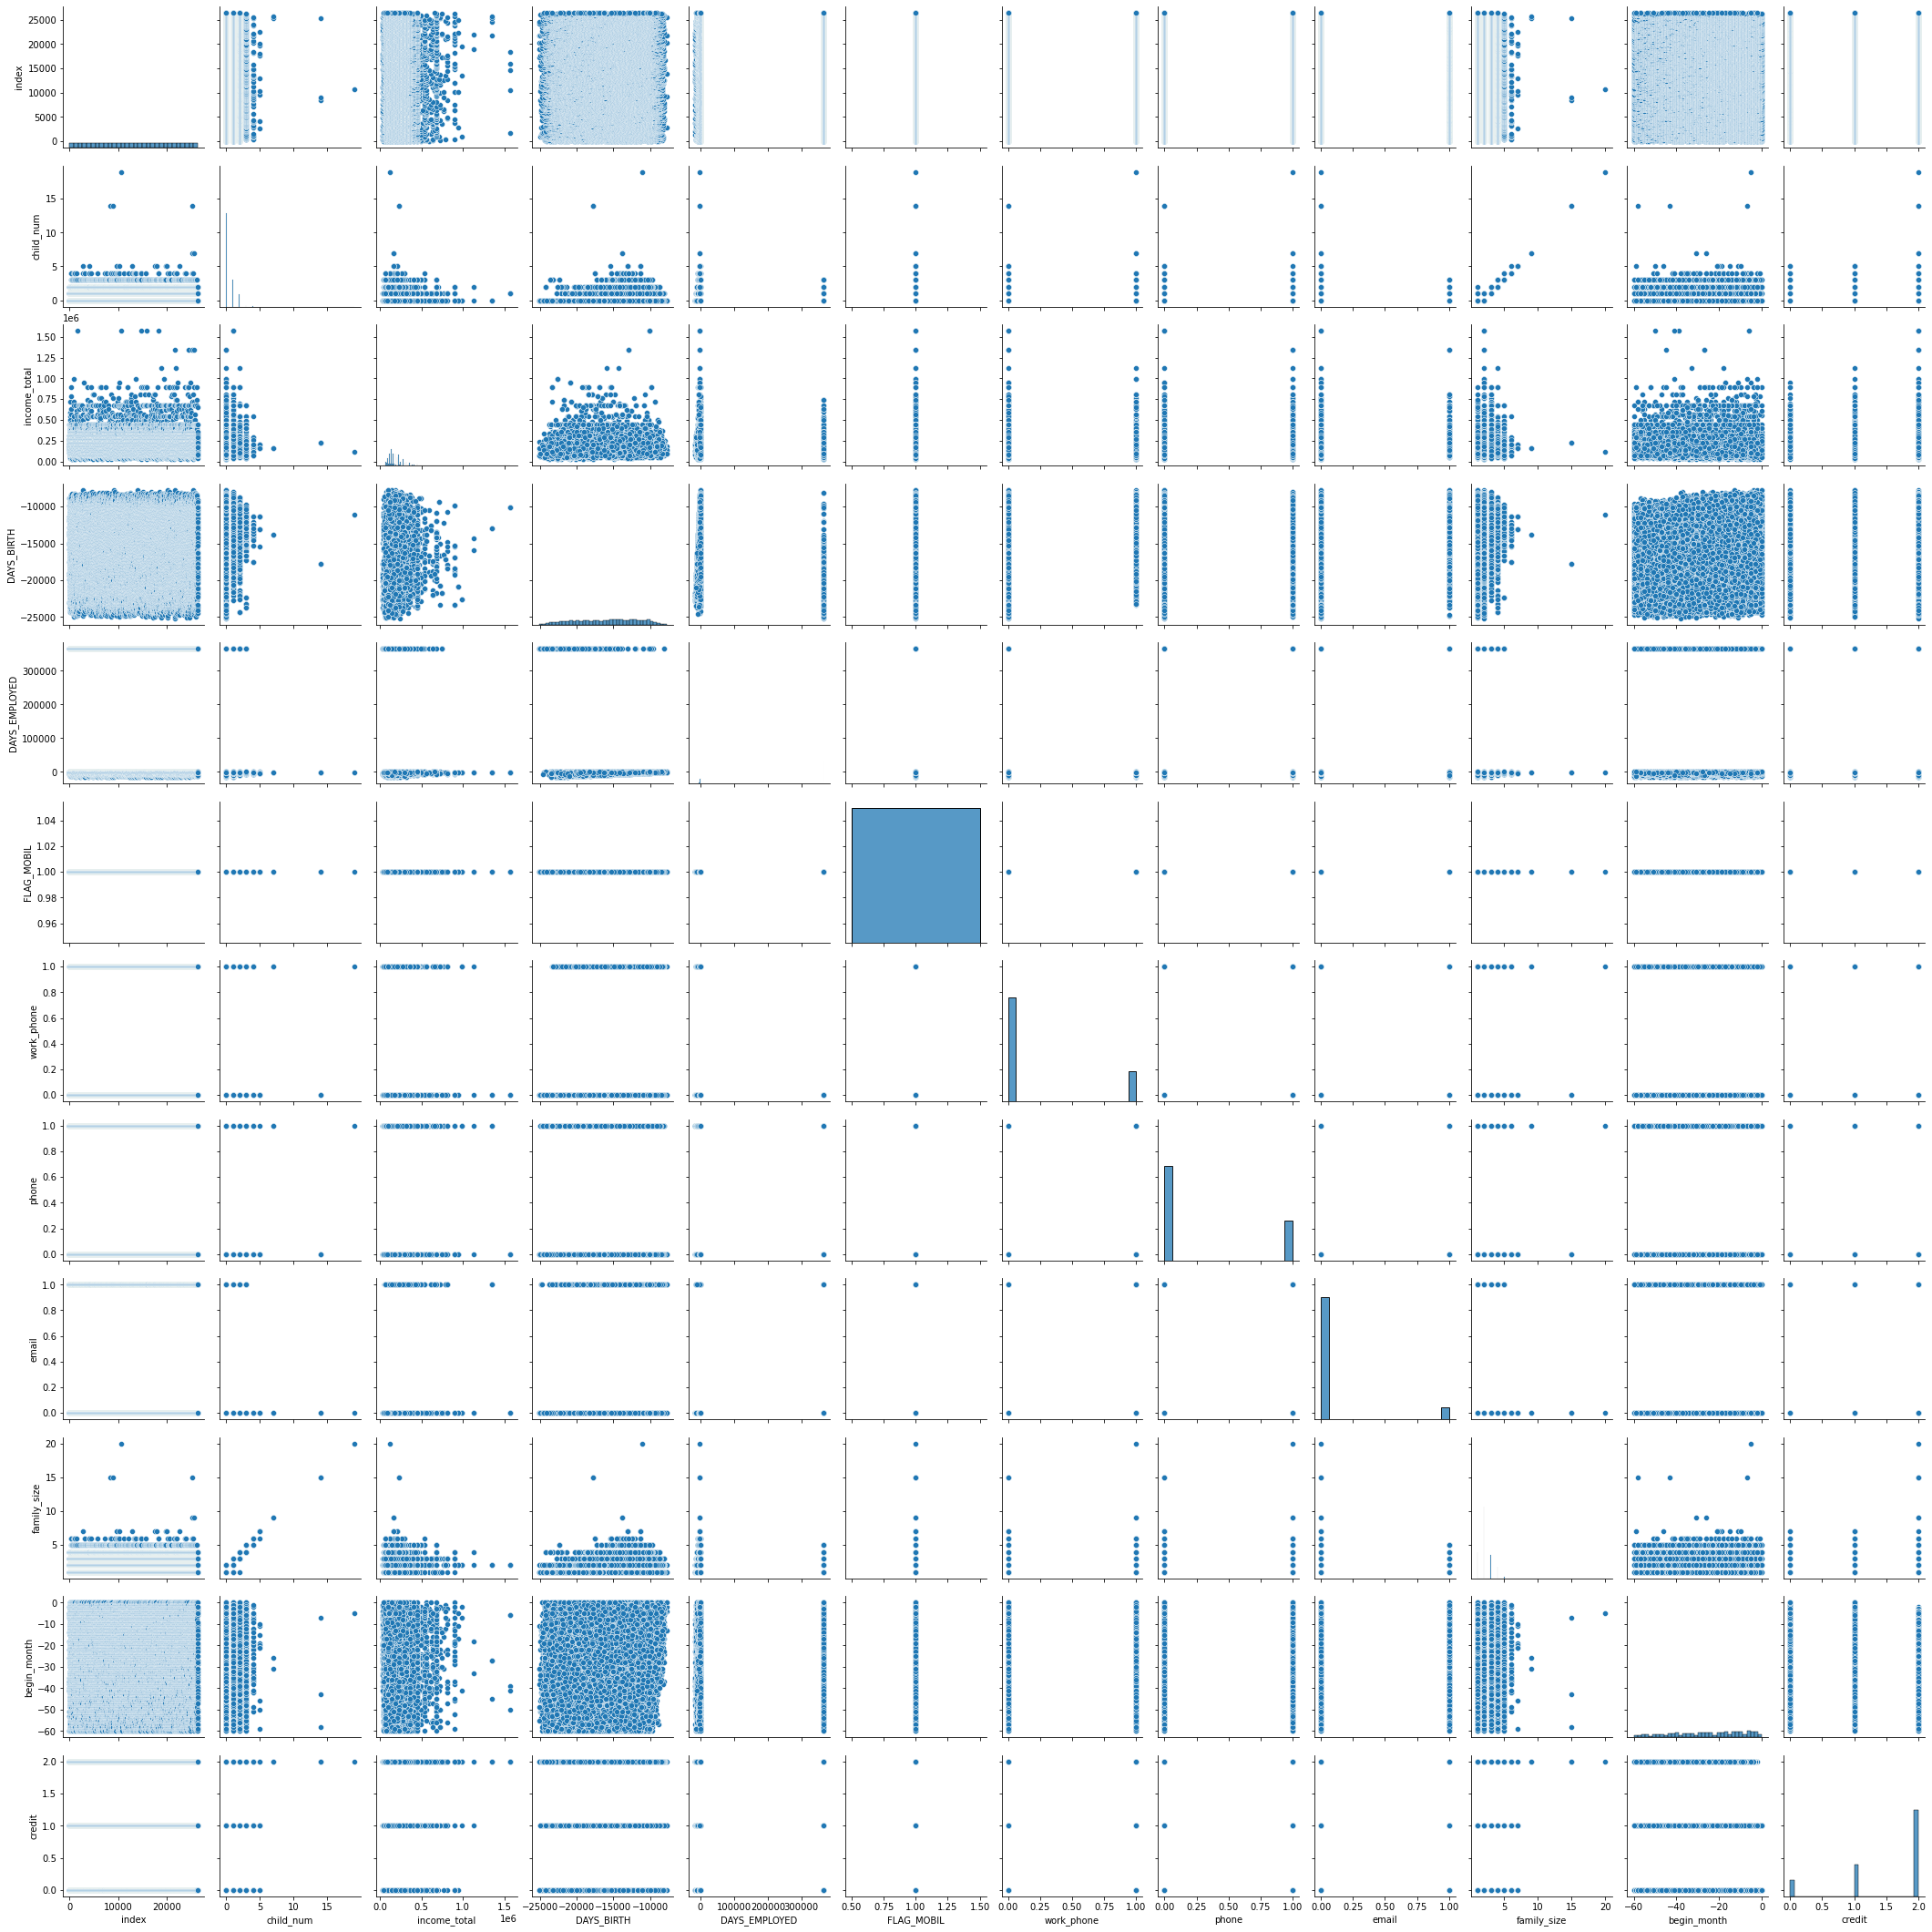

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(ddf)

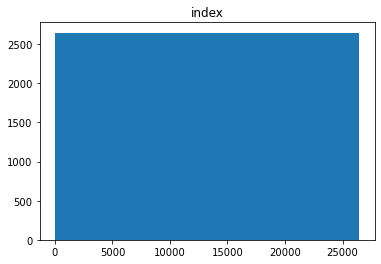

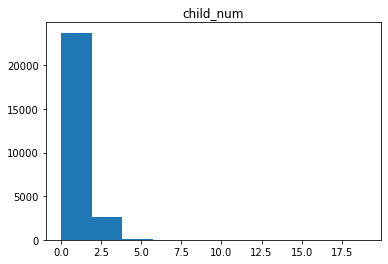

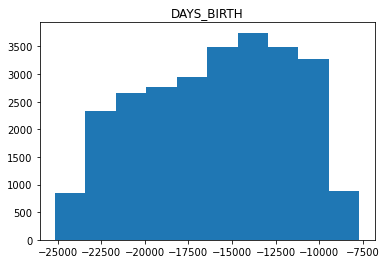

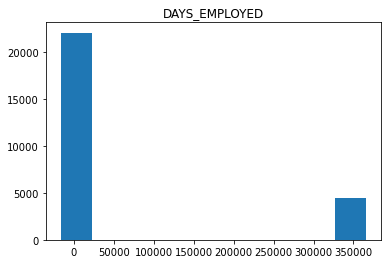

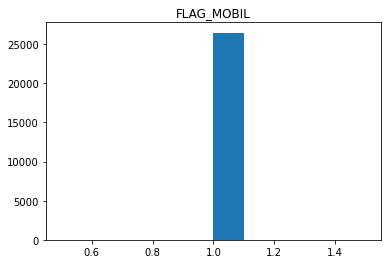

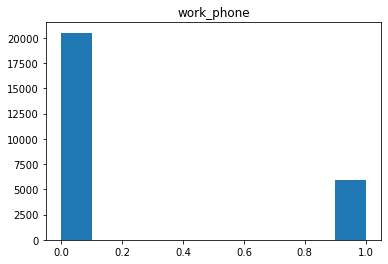

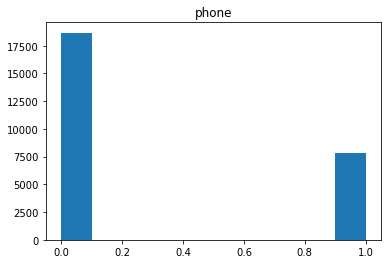

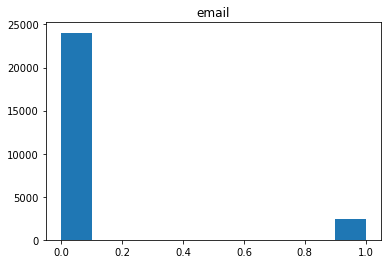

In [7]:
for v in ddf.select_dtypes(include='int64'):
    target = ddf[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

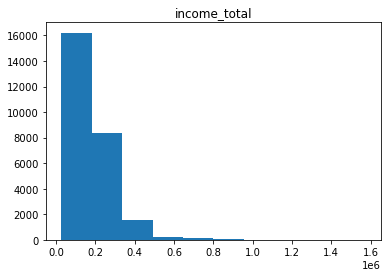

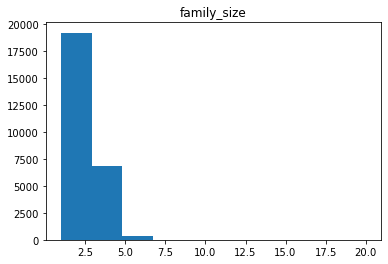

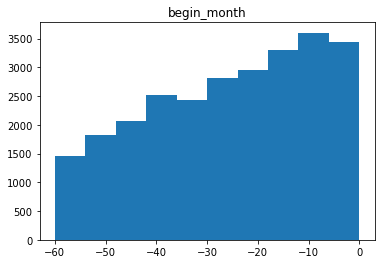

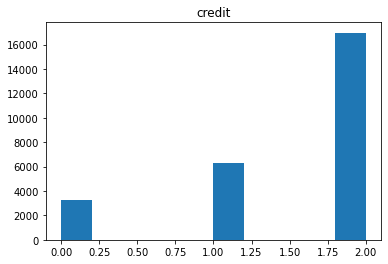

In [8]:
for v in ddf.select_dtypes(include='float'):
    target = ddf[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

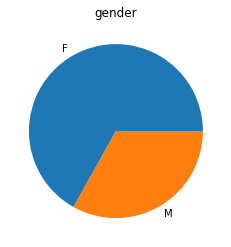

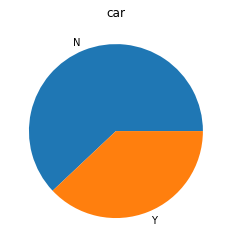

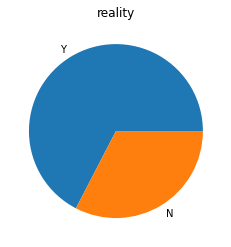

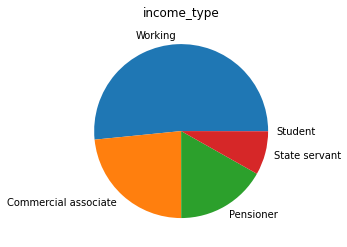

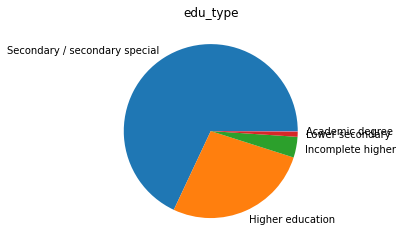

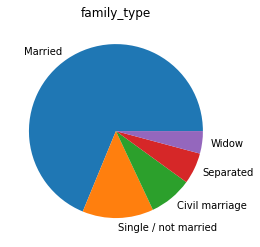

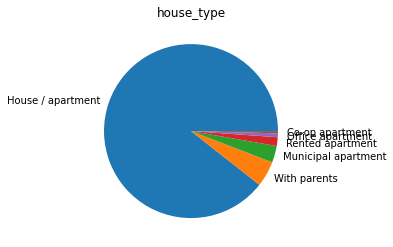

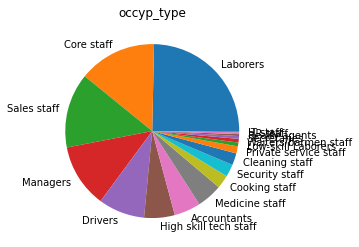

In [78]:
for v in ddf.select_dtypes(include='object'):
    target = ddf[v].value_counts()
    plt.pie(target.values, labels=target.index)
    plt.title(v)
    plt.show()

In [114]:
df = ddf.copy()
df = df.astype({'credit':int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [115]:
df.loc[df['credit'] > 0, 'credit_flag'] = 1
df.loc[df['credit'] == 0, 'credit_flag'] = 0   
df['credit_flag'] = df['credit_flag'].astype(int)
df.info()
# credit == 0 이면 이탈로 분류

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [116]:
df['credit_flag'].value_counts()

1    23235
0     3222
Name: credit_flag, dtype: int64

In [117]:
# 문자변수들 범주형으로 변경

In [118]:
df['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [119]:
df.loc[(df['income_type'] == 'Commercial associate') | 
       (df['income_type'] == 'State servant') | 
       (df['income_type'] == 'Working'), 'income_type_2' ] = 'worker'

df.loc[(df['income_type'] == 'Pensioner') | 
       (df['income_type'] == 'Student'), 'income_type_2' ] = 'non-worker'

In [120]:
df['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [121]:
df.loc[(df['edu_type'] == 'Higher education') | 
       (df['edu_type'] == 'Incomplete higher') | 
       (df['edu_type'] == 'Lower secondary')| 
       (df['edu_type'] == 'Academic degree'), 'edu_type_2' ] = 'else'

df.loc[(df['edu_type'] == 'Secondary / secondary special'), 'edu_type_2' ] = 'secondary'

In [122]:
df['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [123]:
df.loc[(df['family_type'] == 'Single / not married') | 
       (df['family_type'] == 'Civil marriage') | 
       (df['family_type'] == 'Separated')| 
       (df['family_type'] == 'Widow'), 'family_type_2' ] = 'else'

df.loc[(df['family_type'] == 'Married'), 'family_type_2' ] = 'Married'

In [124]:
df['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [125]:
df.loc[(df['house_type'] == 'With parents') | 
       (df['house_type'] == 'Municipal apartment') | 
       (df['house_type'] == 'Rented apartment')| 
       (df['house_type'] == 'Office apartment')|
       (df['house_type'] == 'Co-op apartment'), 'house_type_2' ] = 'else'

df.loc[(df['house_type'] == 'House / apartment'), 'house_type_2' ] = 'House / apartment'

In [126]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'credit_flag',
       'income_type_2', 'edu_type_2', 'family_type_2', 'house_type_2'],
      dtype='object')

In [127]:
ddff = df.copy()
df2 = ddff.drop(['index','income_type', 'edu_type', 'family_type',
                 'house_type','occyp_type','credit'], axis=1)

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   DAYS_BIRTH     26457 non-null  int64  
 6   DAYS_EMPLOYED  26457 non-null  int64  
 7   FLAG_MOBIL     26457 non-null  int64  
 8   work_phone     26457 non-null  int64  
 9   phone          26457 non-null  int64  
 10  email          26457 non-null  int64  
 11  family_size    26457 non-null  float64
 12  begin_month    26457 non-null  float64
 13  credit_flag    26457 non-null  int32  
 14  income_type_2  26457 non-null  object 
 15  edu_type_2     26457 non-null  object 
 16  family_type_2  26457 non-null  object 
 17  house_type_2   26457 non-null  object 
dtypes: flo

In [129]:
##  분리되어있는 train set 에도 동일하게 전처리 적용

In [130]:
train = df2.copy()

df_test = pd.read_csv('data/adp19-2_test.csv')


In [131]:
df_test.loc[(df_test['income_type'] == 'Commercial associate') | 
       (df_test['income_type'] == 'State servant') | 
       (df_test['income_type'] == 'Working'), 'income_type_2' ] = 'worker'

df_test.loc[(df_test['income_type'] == 'Pensioner') | 
       (df_test['income_type'] == 'Student'), 'income_type_2' ] = 'non-worker'


df_test.loc[(df_test['edu_type'] == 'Higher education')| 
       (df_test['edu_type'] == 'Incomplete higher') | 
       (df_test['edu_type'] == 'Lower secondary')| 
       (df_test['edu_type'] == 'Academic degree'), 'edu_type_2' ] = 'else'


df_test.loc[(df_test['edu_type'] == 'Secondary / secondary special'), 'edu_type_2' ] = 'secondary'

df_test.loc[(df_test['family_type'] == 'Single / not married') | 
       (df_test['family_type'] == 'Civil marriage') | 
       (df_test['family_type'] == 'Separated')| 
       (df_test['family_type'] == 'Widow'), 'family_type_2' ] = 'else'

df_test.loc[(df_test['family_type'] == 'Married'), 'family_type_2' ] = 'Married'


df_test.loc[(df_test['house_type'] == 'With parents') | 
       (df_test['house_type'] == 'Municipal apartment') | 
       (df_test['house_type'] == 'Rented apartment')| 
       (df_test['house_type'] == 'Office apartment')|
       (df_test['house_type'] == 'Co-op apartment'), 'house_type_2' ] = 'else'

df_test.loc[(df_test['house_type'] == 'House / apartment'), 'house_type_2' ] = 'House / apartment'


test = df_test.drop(['index','income_type', 'edu_type', 'family_type',
                 'house_type','occyp_type'], axis=1)

In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   DAYS_BIRTH     10000 non-null  int64  
 6   DAYS_EMPLOYED  10000 non-null  int64  
 7   FLAG_MOBIL     10000 non-null  int64  
 8   work_phone     10000 non-null  int64  
 9   phone          10000 non-null  int64  
 10  email          10000 non-null  int64  
 11  family_size    10000 non-null  float64
 12  begin_month    10000 non-null  float64
 13  income_type_2  10000 non-null  object 
 14  edu_type_2     10000 non-null  object 
 15  family_type_2  10000 non-null  object 
 16  house_type_2   10000 non-null  object 
dtypes: float64(3), int64(7), object(7)
memory usage: 1.

In [199]:
# object -> 더미변수로 변경

train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

train_dummies.columns


Index(['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit_flag', 'gender_F', 'gender_M', 'car_N', 'car_Y',
       'reality_N', 'reality_Y', 'income_type_2_non-worker',
       'income_type_2_worker', 'edu_type_2_else', 'edu_type_2_secondary',
       'family_type_2_Married', 'family_type_2_else',
       'house_type_2_House / apartment', 'house_type_2_else'],
      dtype='object')

In [213]:
# train set 을 7:3 으로 분리 (train / eval)

from sklearn.model_selection import train_test_split

X = train_dummies.drop(columns=['credit_flag'])
y = train_dummies['credit_flag']

X_train, X_eval, y_train, y_eval = train_test_split(X,y,stratify=y, 
                                                   random_state=99, test_size=0.35)

In [214]:
## 이탈여부 예측하는 분류모델 3가지 생성 + 각 모델별 ConfusionMatrix

train_X = X_train.drop(['gender_F','car_N','reality_N','income_type_2_non-worker',
                     'edu_type_2_else','family_type_2_else','house_type_2_else'], axis=1)

eval_X =  X_eval.drop(['gender_F','car_N','reality_N','income_type_2_non-worker',
                     'edu_type_2_else','family_type_2_else','house_type_2_else'], axis=1)

test_X = test_dummies.drop(['gender_F','car_N','reality_N','income_type_2_non-worker',
                     'edu_type_2_else','family_type_2_else','house_type_2_else'], axis=1)

train_y = y_train.copy()



eval_y = y_eval.reset_index()
ev_y = eval_y.copy()
eval_y = ev_y.drop(columns=['index'], axis=1)

In [215]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score 
import seaborn as sns

In [216]:
result_time = []
comp_df = []


for X_tr, y_tr in [(train_X, train_y)]:
    
    trainX = X_tr.copy()
    evalX = eval_X.copy()
    
    
    
    lrstart = time.time()
    lr = LogisticRegression()
    lr.fit(trainX, y_tr)
    lrend = time.time() - lrstart
    
    pred_lr = lr.predict(evalX)
    
   
  
    rfstart = time.time()
    rf = RandomForestClassifier()
    rf.fit(trainX, y_tr)
    rfend = time.time() - rfstart
    
    pred_rf = rf.predict(evalX)
 

    dtstart = time.time()
    dt = DecisionTreeClassifier(random_state=99, max_depth=5)
    dt.fit(trainX, y_tr)
    dtend = time.time() - dtstart
    
    pred_dt = dt.predict(evalX)
    

    result_time.append([lrend, rfend, dtend])


In [217]:
df_pred_lr = pd.DataFrame(pred_lr)
df_pred_lr.columns = ['pred_lr']

df_pred_rf = pd.DataFrame(pred_rf)
df_pred_rf.columns = ['pred_rf']

df_pred_dt = pd.DataFrame(pred_dt)
df_pred_dt.columns = ['pred_dt']

comp_df = pd.concat([eval_y, df_pred_lr, df_pred_rf, df_pred_dt], axis=1)
comp_df


,credit_flag,pred_lr,pred_rf,pred_dt
0,1,1,1,1
1,0,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
9255,1,1,1,1
9256,1,1,1,1
9257,1,1,1,1
9258,1,1,1,1


In [219]:
# eval_y (실제값)과 예측값의 ConfusionMatrix

cm2_lr = confusion_matrix(comp_df['credit_flag'],comp_df['pred_lr'])
cmdf2_lr = pd.DataFrame(cm2_lr, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])


cm2_rf = confusion_matrix(comp_df['credit_flag'],comp_df['pred_rf'])
cmdf2_rf = pd.DataFrame(cm2_rf, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])

    
cm2_dt = confusion_matrix(comp_df['credit_flag'],comp_df['pred_dt'])
cmdf2_dt = pd.DataFrame(cm2_dt, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])

      

In [244]:
# classification report 
print('classification report - 로지스틱 회귀')
report_lr = classification_report(comp_df['credit_flag'],comp_df['pred_lr'])
print(report_lr)

print('classification report - 랜덤포레스트')
report_rf = classification_report(comp_df['credit_flag'],comp_df['pred_rf'])
print(report_rf)


print('classification report - 결정트리')
report_dt = classification_report(comp_df['credit_flag'],comp_df['pred_dt'])
print(report_dt)

print('소요시간')
result_times = pd.DataFrame(result_time)
result_times.columns = ['lr','rf','dt']
result_times

classification report - 로지스틱 회귀
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1128
           1       0.88      1.00      0.94      8132

    accuracy                           0.88      9260
   macro avg       0.44      0.50      0.47      9260
weighted avg       0.77      0.88      0.82      9260

classification report - 랜덤포레스트
              precision    recall  f1-score   support

           0       0.48      0.21      0.29      1128
           1       0.90      0.97      0.93      8132

    accuracy                           0.88      9260
   macro avg       0.69      0.59      0.61      9260
weighted avg       0.85      0.88      0.85      9260

classification report - 결정트리
              precision    recall  f1-score   support

           0       0.38      0.01      0.01      1128
           1       0.88      1.00      0.93      8132

    accuracy                           0.88      9260
   macro avg       0.63      0.50   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,lr,rf,dt
0,0.052857,2.085461,0.03787


In [232]:
# 필요한 값 만 구할 경우 
from sklearn.metrics import precision_score, recall_score, f1_score

print('정밀도 / 재현율 / f1 score - 로지스틱 회귀')
print('precision', precision_score(comp_df['credit_flag'],comp_df['pred_lr']))
print('recall', recall_score(comp_df['credit_flag'],comp_df['pred_lr']))
print('f1', f1_score(comp_df['credit_flag'],comp_df['pred_lr']))


print('정밀도 / 재현율 / f1 score - 랜덤 포레스트')
print('precision', precision_score(comp_df['credit_flag'],comp_df['pred_rf']))
print('recall', recall_score(comp_df['credit_flag'],comp_df['pred_rf']))
print('f1', f1_score(comp_df['credit_flag'],comp_df['pred_rf']))


print('정밀도 / 재현율 / f1 score - 의사결정나무')
print('precision', precision_score(comp_df['credit_flag'],comp_df['pred_dt']))
print('recall', recall_score(comp_df['credit_flag'],comp_df['pred_dt']))
print('f1', f1_score(comp_df['credit_flag'],comp_df['pred_dt']))

정밀도 / 재현율 / f1 score - 로지스틱 회귀
precision 0.8781857451403887
recall 1.0
f1 0.9351425942962281
정밀도 / 재현율 / f1 score - 랜덤 포레스트
precision 0.8982199908717481
recall 0.9680275454992622
f1 0.9318181818181819
정밀도 / 재현율 / f1 score - 의사결정나무
precision 0.8787747591730707
recall 0.9984013772749631
f1 0.9347763513902482


In [233]:
# confusion matrix - lr
print('로지스틱 회귀 실제값(eval_y)과 예측값(pred_lr)')
cmdf2_lr

로지스틱 회귀 실제값(eval_y)과 예측값(pred_lr)


,예측값(N),예측값(P)
실제값(N),0,1128
실제값(P),0,8132


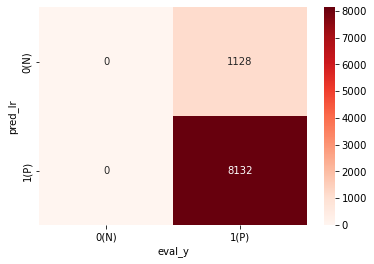

In [234]:
# confusion matrix - lr 히트맵

sns.heatmap(cm2_lr, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('eval_y')
plt.ylabel('pred_lr')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()


In [235]:
# confusion matrix - rf
print('랜덤포레스트 실제값(eval_y)과 예측값(pred_rf)')
cmdf2_rf

랜덤포레스트 실제값(eval_y)과 예측값(pred_rf)


,예측값(N),예측값(P)
실제값(N),236,892
실제값(P),260,7872


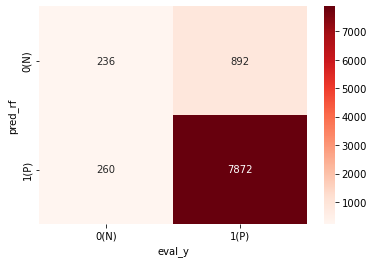

In [236]:
# confusion matrix - rf 히트맵

sns.heatmap(cm2_rf, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('eval_y')
plt.ylabel('pred_rf')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

In [237]:
# confusion matrix - dt
print('의사결정나무 실제값(eval_y)과 예측값(pred_dt)')
cmdf2_dt

의사결정나무 실제값(eval_y)과 예측값(pred_dt)


,예측값(N),예측값(P)
실제값(N),8,1120
실제값(P),13,8119


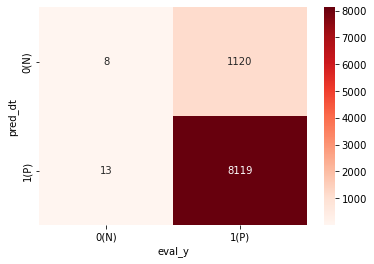

In [238]:
# confusion matrix - dt 히트맵

sns.heatmap(cm2_dt, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('eval_y')
plt.ylabel('pred_dt')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

In [ ]:
### 위의 모델 바탕으로 앙상블 모형 만들고 
### test.csv 데이터로 예측한 이탈여부 확률을 result.csv로 저장

In [247]:
# test 데이터로 예측값 산출
pred_lr_test = lr.predict(test_X)
pred_rf_test = rf.predict(test_X)
pred_dt_test = dt.predict(test_X)


In [248]:
df_pred_lr_test = pd.DataFrame(pred_lr_test)
df_pred_lr_test.columns = ['pred_lr']

df_pred_rf_test = pd.DataFrame(pred_rf_test)
df_pred_rf_test.columns = ['pred_rf']

df_pred_dt_test = pd.DataFrame(pred_dt_test)
df_pred_dt_test.columns = ['pred_dt']

comp_df_test = pd.concat([df_pred_lr_test, df_pred_rf_test, df_pred_dt_test], axis=1)
comp_df_test

,pred_lr,pred_rf,pred_dt
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
9995,1,1,1
9996,1,1,1
9997,1,1,1
9998,1,1,1


In [249]:
comp_df_test['sum']=comp_df_test['pred_lr']+comp_df_test['pred_rf']+comp_df_test['pred_dt']

In [254]:
comp_df_test['ratio'] = comp_df_test['sum']/3*100

In [256]:
df_result = pd.DataFrame(comp_df_test['ratio'])

In [259]:
df_result.to_csv('data/result.csv',index=False )

array([[<AxesSubplot:title={'center':'ratio'}>]], dtype=object)

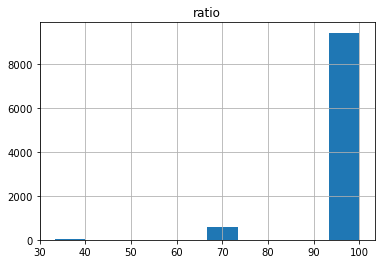

In [261]:
df_result.hist()